<a href="https://colab.research.google.com/github/ryan-huang1/morph-diffusion/blob/main/morph-diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting User Inputs, Number of Images + Image Prompts

In [14]:
image_count = int(input("How many images would you like in your video? "))

if image_count > 25:
    raise SystemExit("You can only use have 25 images or less!")

image_prompts = []

for i in range(image_count):
  in_text = f"What would you like image #{str(i + 1)} to be? "
  response = input(in_text)
  image_prompts.append(f'photo of a {response} high resolution, in the middle of a road')

print(image_prompts)

How many images would you like in your video? 10
What would you like image #1 to be? a dog
What would you like image #2 to be? a cat
What would you like image #3 to be? a brown camel
What would you like image #4 to be? a large elephant
What would you like image #5 to be? a large coffee mug
What would you like image #6 to be? a vase
What would you like image #7 to be? a blue car
What would you like image #8 to be? a stop sign
What would you like image #9 to be? traffic lights
What would you like image #10 to be? a book
['photo of a a dog high resolution, in the middle of a road', 'photo of a a cat high resolution, in the middle of a road', 'photo of a a brown camel high resolution, in the middle of a road', 'photo of a a large elephant high resolution, in the middle of a road', 'photo of a a large coffee mug high resolution, in the middle of a road', 'photo of a a vase high resolution, in the middle of a road', 'photo of a a blue car high resolution, in the middle of a road', 'photo of 

## Install HuggingFace Dependencies Using Pip

In [15]:
!pip install -qq -U diffusers==0.6.0 transformers ftfy gradio
!pip install git+https://github.com/huggingface/diffusers.git

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 1683, in _parseNoCache
    loc, tokens = self.parseImpl(instring, preloc, doActions)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pyparsing.py", line 2897, in parseImpl
    if instring[loc] == self.firstMatchChar:
IndexError: string index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", 

First , in order to use the model, you need to accept the model license before downloading or using the weights. In this post we'll use `runwayml/stable-diffusion-inpainting` model released by Runwayml so you'll need to  visit [its card](https://huggingface.co/runwayml/stable-diffusion-inpainting), read the license and tick the checkbox if you agree. 

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please refer to [this section of the documentation](https://huggingface.co/docs/hub/security-tokens).

## Launch HuggingFace Token Auth GUI

In [4]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


## Install Stable Diffusion Inpainting Dependencies

In [5]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

## Download Stable Diffussion Inpainting Checkpoint v1.5 From HuggingFace

In [6]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/287 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/635 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/821 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/810 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/613 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

## Clone and Install Diff Morph Dependencies

In [7]:
#@title Step 1: Load pre-requisites
!git clone https://github.com/volotat/DiffMorph
%cd DiffMorph
!pip install -r requirements.txt
!mkdir input
!mkdir output

import os

Cloning into 'DiffMorph'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 202 (delta 21), reused 38 (delta 17), pack-reused 153
Receiving objects: 100% (202/202), 86.20 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/DiffMorph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.3 kB/s 
     |████████████████████████████████| 1.1 MB 14.6 MB/s 
     |████████████████████████████████| 78 kB 4.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


## Request and Process Images from Github Servers

In [16]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://github.com/ryan-huang1/media-storage/blob/main/fall.png?raw=true"
mask_url = "https://raw.githubusercontent.com/ryan-huang1/media-storage/main/fall-larger-mask.png"

## Resize Background Image to 512x512

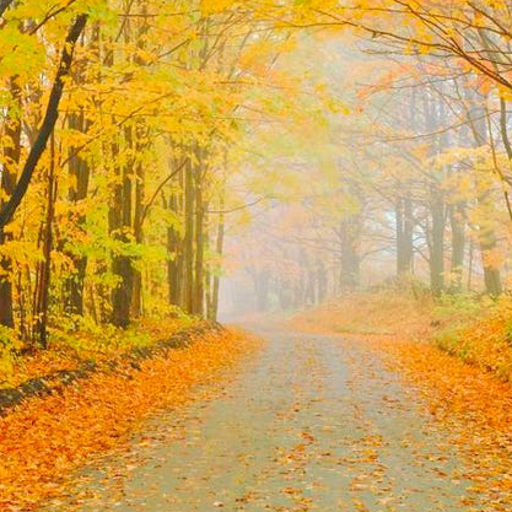

In [9]:
image = download_image(img_url).resize((512, 512))
image

## Resize Mask Image to 512x512

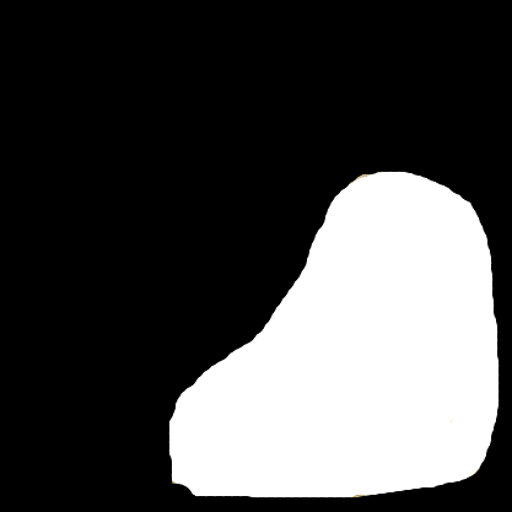

In [10]:
mask_image = download_image(mask_url).resize((512, 512))
mask_image

## Image Generation Pipeline Init

In [17]:
import random
print(image_prompts)

for i in range(len(image_prompts)):

  guidance_scale=9.5
  num_samples = 3
  generator = torch.Generator(device="cuda").manual_seed(23829) # change the seed to get different results

  images = pipe(
      prompt=image_prompts[i],
      image=image,
      mask_image=mask_image,
      guidance_scale=guidance_scale,
      generator=generator,
      num_images_per_prompt=num_samples,
  ).images
  # images.insert(0, image)
  # for h in range(3):
  #   first_image = images[h]
  #   first_image.save(f'/content/DiffMorph/input/{i}set_{h}_image.png')
  #   print(f'/content/DiffMorph/input/{i}{h}_image.png')
  first_image = images[1]
  #/content/IMG_99F73B53FE1D-1.jpeg
  #/content/DiffMorph/input/0_image.png
  first_image.save(f'/content/DiffMorph/input/{i}_image.png')
  print(f'{i}_image.png saved!!')

['photo of a a dog high resolution, in the middle of a road', 'photo of a a cat high resolution, in the middle of a road', 'photo of a a brown camel high resolution, in the middle of a road', 'photo of a a large elephant high resolution, in the middle of a road', 'photo of a a large coffee mug high resolution, in the middle of a road', 'photo of a a vase high resolution, in the middle of a road', 'photo of a a blue car high resolution, in the middle of a road', 'photo of a a stop sign high resolution, in the middle of a road', 'photo of a traffic lights high resolution, in the middle of a road', 'photo of a a book high resolution, in the middle of a road']


  0%|          | 0/50 [00:00<?, ?it/s]

0_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

1_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

2_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

3_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

4_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

5_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

6_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

7_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

8_image.png saved!!


  0%|          | 0/50 [00:00<?, ?it/s]

9_image.png saved!!


## DiffMorph Init

In [18]:
image_list = [file for file in os.listdir('input') if not file.startswith('.')]
image_list.sort()
epochs = 1000 #@param {type:"number"}
warp_scale = 0.15 #@param {type:"number"}
mult_scale = 0.7 #@param {type:"number"}
add_scale = 0.7 #@param {type:"number"}
add_first = False #@param {type:"boolean"}
filenames = []
for i in range(len(image_list) - 1):
    start = f'input/{image_list[i]}'
    end = f'input/{image_list[i+1]}'
    if add_first:
        !python morph.py -s $start -t $end -e $epochs -a $add_scale -m $mult_scale -w $warp_scale --add_first
    else:
        !python morph.py -s $start -t $end -e $epochs -a $add_scale -m $mult_scale -w $warp_scale
    filename = f'output/morph{i:03d}.mp4'
    filenames.append(filename)
    !mv /content/DiffMorph/morph/morph.mp4 $filename

2022-10-24 16:18:55.863365: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-24 16:18:58.573047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 16:18:59.405941: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-10-24 16:18:59.406041: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/tas

## Combine DiffMorph Individal Outputs into a Singluar Video 

In [19]:
with open('filenames.txt', 'w') as f:
    f.write('\n'.join([f"file '{filename}'" for filename in filenames]))
!ffmpeg -f concat -i filenames.txt -codec copy output/final.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

## Download All Final Video to Local Machine

In [20]:
# @title Step 5: Download video
#@markdown Note: this cell will only work if you are running this notebook in Google colab. Otherwise, locate the final output in DiffMorph/output/final.mp4

from google.colab import files
files.download('/content/DiffMorph/output/final.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>